# Applying the Model

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [3]:
img_md_subset = pd.read_csv('../../../Data/ifcb_ecotaxa_subset_update.csv')
img_md_subset = img_md_subset.drop('Unnamed: 0', 1)

In [4]:
img_md_subset = pd.read_csv('../../../Data/ecotaxa_export_3203_20200909_1843.tsv', sep='\t')

In [4]:
img_md_subset.head()

,object_id,object_annotation_status,object_annotation_category,object_annotation_hierarchy,sample_flag,object_lat,object_lon,object_date,object_time,object_pmt_fluorescence,object_peak_fluorescence
0,D20180221T193119_IFCB116_01153,validated,Pyramimonas,living>Eukaryota>Archaeplastida>Viridiplantae>...,good,-64.7535,-64.1339,20180221,193119,0.26577,1.71370
1,D20180221T202431_IFCB116_00153,validated,Gymnodinium,living>Eukaryota>Harosa>Alveolata>Myzozoa>Holo...,good,-64.7741,-64.1655,20180221,202431,0.00269,0.01279
2,D20180221T202431_IFCB116_01303,validated,Gymnodinium,living>Eukaryota>Harosa>Alveolata>Myzozoa>Holo...,good,-64.7741,-64.1655,20180221,202431,0.17801,1.47800
3,D20180221T202431_IFCB116_03008,validated,Katodinium,living>Eukaryota>Harosa>Alveolata>Myzozoa>Holo...,good,-64.7741,-64.1655,20180221,202431,0.00254,0.01276
4,D20180221T212254_IFCB116_07034,validated,Pyramimonas,living>Eukaryota>Archaeplastida>Viridiplantae>...,good,-64.7802,-63.9785,20180221,212254,0.02183,0.35693


In [5]:
len(img_md_subset)

1977145

In [37]:
dtps = []
for dt in img_md_subset.dtypes:
    if dt == 'float64':
        dtps.append('f')
    elif dt == 'object':
        dtps.append('t')

In [39]:
for i in dtps:
    print(i)

t
f
f
t
f
f
t
t
t
f
f
t
t
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
f
t
f
t
t
t
t
t
t
f
f
f
f
t
t
t
t
t
t
t
t
t
t
t
f


In [4]:
# For now only using validated images
#img_md_subset = img_md_subset[img_md_subset.object_annotation_status == 'validated']

In [6]:
img_md_subset.columns

Index(['object_id', 'object_annotation_status', 'object_annotation_category',
       'object_annotation_hierarchy', 'sample_flag', 'object_lat',
       'object_lon', 'object_date', 'object_time', 'object_pmt_fluorescence',
       'object_peak_fluorescence'],
      dtype='object')

In [7]:
from keras import backend as K
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


['/job:localhost/replica:0/task:0/device:GPU:0']

In [8]:
import glob, os

file_dir = '../../../Data/140920_export/'

os.chdir(file_dir)
fn_list = []
for file in glob.glob("*.png"):
    fn_list.append(file)
    
print(len(fn_list))

fn_edit = [x[:-4] for x in fn_list]

available_subset = img_md_subset[img_md_subset['object_id'].isin(fn_edit)]
len(available_subset)

1976952


1977145

In [35]:
class_id_dict = {'Amphiprora': 0,
 'Bacillariophyceae': 1,
 'Banquisia belgicae': 2,
 'Ceratium': 3,
 'Chaetoceros single': 4,
 'Chaetoceros<Mediophyceae': 5,
 'Ciliophora': 6,
 'Corethron': 7,
 'Cryptophyta': 8,
 'Cylindrotheca': 9,
 'Dactyliosolen': 10,
 'Dictyochales': 11,
 'Dinophyceae': 12,
 'Dinophysis': 13,
 'Eucampia': 14,
 'Eucampia chain': 15,
 'Guinardia': 16,
 'Gymnodinium': 17,
 'Gyrodinium': 18,
 'Katodinium': 19,
 'Licmophora': 20,
 'Membraneis': 21,
 'Navicula': 22,
 'Nitzschia frigida': 23,
 'Odontella sp.': 24,
 'Phaeocystis': 25,
 'Proboscia sp.': 26,
 'Pseudo-Nitzschia chain': 27,
 'Pyramimonas': 28,
 'Rhizosolenia': 29,
 'Thalassiosira': 30,
 'Tintinnida': 31,
 'Torodinium': 32,
 'Warnowia': 33,
 'badfocus<artefact': 34,
 'bead': 35,
 'bubble': 36,
 'centric': 37,
 'centric 1 temp': 38,
 'centric 2 temp': 39,
 'centric 3 temp': 40,
 'centric 4 temp': 41,
 'centric 6 temp': 42,
 'chain<centric': 43,
 'chain<pennate': 44,
 'detritus': 45,
 'dinoflagellate-i': 46,
 'dinoflagellate-ii': 47,
 'dinoflagellate-iii': 48,
 'multiple<other': 49,
 'part<other': 50,
 'pennate 10 temp': 51,
 'pennate 11 temp': 52,
 'pennate 2 temp': 53,
 'pennate 7 temp': 54,
 'pennate<Bacillariophyta': 55,
 't002': 56,
 't003': 57,
 't005': 58,
 't006': 59,
 't007': 60,
 't008': 61,
 't009': 62,
 't010': 63,
 't011': 64,
 't012': 65,
 't013': 66,
 't016': 67,
 't017': 68,
 't019': 69,
 'temp cylindrotheca': 70}

id_class_dict = dict((v,k) for k,v in class_id_dict.items())

In [10]:
len(class_id_dict)

79

In [11]:
frac = 0.01
int(len(available_subset) * frac)

19771

In [12]:
prediction_subset = available_subset.sample(frac=frac)

In [13]:
prediction_subset.head()

,object_id,object_annotation_status,object_annotation_category,object_annotation_hierarchy,sample_flag,object_lat,object_lon,object_date,object_time,object_pmt_fluorescence,object_peak_fluorescence
612744,D20190124T120312_IFCB116_00617,predicted,pennate 2 temp,living>Eukaryota>Harosa>Stramenopiles>Ochrophy...,good,-68.6900,-77.3287,20190124,120312,0.04098,0.39085
1808103,D20181126T203205_IFCB116_00075,predicted,Cryptophyta,living>Eukaryota>Orphans>Cryptophyta,good,-64.7795,-64.0417,20181126,203205,0.03205,0.30236
1500142,D20180208T174140_IFCB116_05915,predicted,t003,temporary>t003,good,-64.7795,-64.0417,20180208,174140,0.01183,0.15014
37085,D20190106T150708_IFCB116_04160,predicted,t002,temporary>t002,good,-64.9340,-64.4002,20190106,150708,0.00519,0.01193
1675341,D20180301T183549_IFCB116_05291,predicted,part<other,living>other>part,good,-64.7795,-64.0417,20180301,183549,0.01281,0.13838


In [14]:
from tensorflow.keras.preprocessing import image
import numpy as np

images = []
labels = []
merged_labels = []
original_labels = []
flu_data = []

for index, row in prediction_subset.iterrows():
    
    # TODO need to think about optimal size and that size actually corresponds to class
    # maybe add blackspace instead of interpolating because it is changing the morphology

    img = image.load_img(row['object_id']+'.png', target_size=(150, 150), color_mode="grayscale")
    images.append(image.img_to_array(img))
    #labels.append(class_id_dict[row['object_annotation_category']])
    #merged_labels.append(row['merged_category'])
    original_labels.append(row['object_annotation_category'])
    flu_data.append([row['object_pmt_fluorescence'], row['object_peak_fluorescence']])
    
images = np.array(images)
labels = np.array(labels)
merged_labels = np.array(merged_labels)
original_labels = np.array(original_labels)
flu_data = np.array(flu_data)

In [15]:
X_predict = images / 130
np.mean(X_predict), np.std(X_predict)

(1.0926685, 0.3766205)

In [17]:
from tensorflow import keras

model = keras.models.load_model('../model_weights_all_classes_flu.hdf5')

In [18]:
X_predict.shape

(19771, 150, 150, 1)

In [19]:
# def generate_data(directory, batch_size):
#     """Replaces Keras' native ImageDataGenerator."""
#     i = 0
#     while True:
        
#         images = []
#         labels = []
#         merged_labels = []
#         original_labels = []

#         for index, row in available_subset.sample(frac=frac).iterrows():

#             # TODO need to think about optimal size and that size actually corresponds to class
#             # maybe add blackspace instead of interpolating because it is changing the morphology

#             img = image.load_img(row['object_id']+'.png', target_size=(150, 150), color_mode="grayscale")
#             images.append(image.img_to_array(img))
#             labels.append(class_id_dict[row['merged_category']])
#             merged_labels.append(row['merged_category'])
#             original_labels.append(row['object_annotation_category'])
        
        
        
#         image_batch = []
#         for b in range(batch_size):
#             if i == len(file_list):
#                 i = 0
#                 random.shuffle(file_list)
#             sample = file_list[i]
#             i += 1
#             image = cv2.resize(cv2.imread(sample[0]), INPUT_SHAPE)
#             image_batch.append((image.astype(float) - 128) / 128)

#         yield np.array(image_batch)

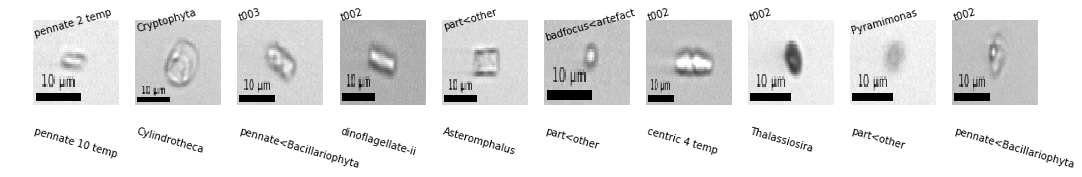

In [20]:
fig, ax = plt.subplots(1, 10, figsize=(18, 10))

indices = np.random.randint(len(X_predict), size=(10))
predictions = np.argmax(model.predict([X_predict[indices], flu_data[indices]]), axis=1)

for i in range(0, 10):
    ax[i].imshow(X_predict[indices[i]].reshape((150, 150)), cmap = 'gray')
    ax[i].axis('off')
    ax[i].text(0,-10, original_labels[i], rotation=16)
    
    ax[i].text(0,200, id_class_dict[predictions[i]],rotation=-16)
plt.show()

In [21]:
predict_prob = model.predict([X_predict, flu_data])

In [22]:
predictions = np.argmax(predict_prob, axis=1)

In [23]:
predict_prob_values = []
for i in range(len(predictions)):
    predict_prob_values.append(predict_prob[i][predictions[i]])

In [24]:
np.mean(predict_prob_values), np.std(predict_prob_values)

(0.79444414, 0.21696973)

In [25]:
prediction_subset.head()

,object_id,object_annotation_status,object_annotation_category,object_annotation_hierarchy,sample_flag,object_lat,object_lon,object_date,object_time,object_pmt_fluorescence,object_peak_fluorescence
612744,D20190124T120312_IFCB116_00617,predicted,pennate 2 temp,living>Eukaryota>Harosa>Stramenopiles>Ochrophy...,good,-68.6900,-77.3287,20190124,120312,0.04098,0.39085
1808103,D20181126T203205_IFCB116_00075,predicted,Cryptophyta,living>Eukaryota>Orphans>Cryptophyta,good,-64.7795,-64.0417,20181126,203205,0.03205,0.30236
1500142,D20180208T174140_IFCB116_05915,predicted,t003,temporary>t003,good,-64.7795,-64.0417,20180208,174140,0.01183,0.15014
37085,D20190106T150708_IFCB116_04160,predicted,t002,temporary>t002,good,-64.9340,-64.4002,20190106,150708,0.00519,0.01193
1675341,D20180301T183549_IFCB116_05291,predicted,part<other,living>other>part,good,-64.7795,-64.0417,20180301,183549,0.01281,0.13838


In [26]:
prediction_subset['image_file_name'] = prediction_subset['object_id'] + '.png'

In [27]:
prediction_subset['prediction_class'] = [id_class_dict[x] for x in predictions]

In [28]:
prediction_subset['prediction_probability'] = predict_prob_values

In [29]:
print('hello\tgoodbye')

hello	goodbye


In [29]:
#prediction_subset.to_csv('../ecotaxa_cnn_predictions_290920.csv', sep='\t')

In [30]:
prediction_subset

,object_id,object_annotation_status,object_annotation_category,object_annotation_hierarchy,sample_flag,object_lat,object_lon,object_date,object_time,object_pmt_fluorescence,object_peak_fluorescence,image_file_name,prediction_class,prediction_probability
612744,D20190124T120312_IFCB116_00617,predicted,pennate 2 temp,living>Eukaryota>Harosa>Stramenopiles>Ochrophy...,good,-68.6900,-77.3287,20190124,120312,0.04098,0.39085,D20190124T120312_IFCB116_00617.png,dinoflagellate-ii,0.735828
1808103,D20181126T203205_IFCB116_00075,predicted,Cryptophyta,living>Eukaryota>Orphans>Cryptophyta,good,-64.7795,-64.0417,20181126,203205,0.03205,0.30236,D20181126T203205_IFCB116_00075.png,centric 4 temp,0.556473
1500142,D20180208T174140_IFCB116_05915,predicted,t003,temporary>t003,good,-64.7795,-64.0417,20180208,174140,0.01183,0.15014,D20180208T174140_IFCB116_05915.png,Rhizosolenia,0.405496
37085,D20190106T150708_IFCB116_04160,predicted,t002,temporary>t002,good,-64.9340,-64.4002,20190106,150708,0.00519,0.01193,D20190106T150708_IFCB116_04160.png,part<other,0.993130
1675341,D20180301T183549_IFCB116_05291,predicted,part<other,living>other>part,good,-64.7795,-64.0417,20180301,183549,0.01281,0.13838,D20180301T183549_IFCB116_05291.png,t004,0.842261
1668447,D20180301T181050_IFCB116_05697,predicted,badfocus<artefact,not-living>artefact>badfocus,good,-64.7795,-64.0417,20180301,181050,0.00411,0.01266,D20180301T181050_IFCB116_05697.png,Rhizosolenia,0.964305
551177,D20190122T165059_IFCB116_00180,predicted,t002,temporary>t002,good,-68.2577,-75.1589,20190122,165059,0.00764,0.03014,D20190122T165059_IFCB116_00180.png,part<other,0.999644
571699,D20190122T180551_IFCB116_03288,predicted,t002,temporary>t002,good,-68.2577,-75.1589,20190122,180551,0.01114,0.14525,D20190122T180551_IFCB116_03288.png,part<other,0.897305
724832,D20171130T163357_IFCB116_00706,predicted,Pyramimonas,living>Eukaryota>Archaeplastida>Viridiplantae>...,good,-64.8138,-64.0417,20171130,163357,0.07021,0.71987,D20171130T163357_IFCB116_00706.png,Nitzschia frigida,0.367041
695234,D20171124T153756_IFCB116_05403,predicted,t002,temporary>t002,good,-64.8138,-64.0417,20171124,153756,0.01383,0.17895,D20171124T153756_IFCB116_05403.png,part<other,0.860155


In [31]:
# model.predict_generator(generator = tile_gen.tile_generator(clean_px, batch_size=100, flatten=True, canopy=True), steps=len(clean_px) // 100, verbose=1)

In [32]:
classes, counts = np.unique(predictions, return_counts=True)
classes, counts

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 33, 34, 35, 36,
        37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
        55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70]),
 array([  26,  296,    1,    6,   58,   83,   39,   18,  935,   51,   14,
          28,  143,    1,    2,    1,    4,  169,   16,    9,    6,   21,
         492,    1,   15,    6,   65,  362,    5,   37,    1, 1671,  563,
          62,   85,   48,  142,   34,    3,   10,   19,  469,  140,  141,
           2,   44,   94,   52,   33,  877,   12,   16, 5581, 1519,    9,
           6,  244, 1566,    2, 1348,  874,  857,   22,   36,   25,   50,
         204]))

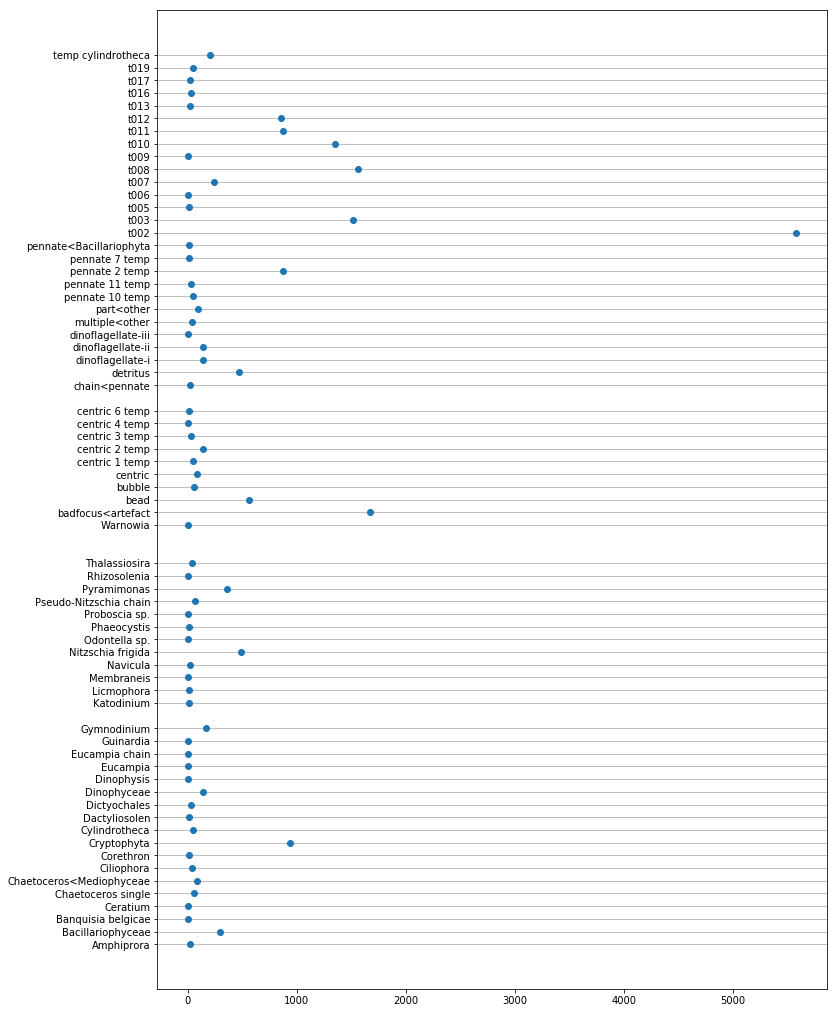

In [49]:
fig, ax = plt.subplots(figsize=(12, 18))
ax.scatter(counts, classes)
ax.set_yticks(classes)
ax.set_yticklabels([id_class_dict[x] for x in classes])
#ax.set_xlim(-10,500)
#ax.set_xscale('log')

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

# Turn on the minor TICKS, which are required for the minor GRID
#ax.minorticks_on()

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='grey', axis='y')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
#plt.savefig('output_predictions.png', dpi=300)
plt.show()

In [50]:
min_count = 20
unique_validated = available_subset.groupby('object_annotation_category')['object_id'].nunique()

sufficient_classes = unique_validated[unique_validated >= min_count]

In [51]:
len(sufficient_classes)

74

In [46]:
#classes, counts = np.unique(labels, return_counts=True)
classes, counts

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 33, 34, 35, 36,
        37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54,
        55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70]),
 array([  26,  296,    1,    6,   58,   83,   39,   18,  935,   51,   14,
          28,  143,    1,    2,    1,    4,  169,   16,    9,    6,   21,
         492,    1,   15,    6,   65,  362,    5,   37,    1, 1671,  563,
          62,   85,   48,  142,   34,    3,   10,   19,  469,  140,  141,
           2,   44,   94,   52,   33,  877,   12,   16, 5581, 1519,    9,
           6,  244, 1566,    2, 1348,  874,  857,   22,   36,   25,   50,
         204]))

In [47]:
sufficient_classes

object_annotation_category
Amphiprora                     5339
Bacillariophyceae             28443
Banquisia belgicae               46
Ceratium                        224
Chaetoceros single             4805
Chaetoceros<Mediophyceae       1438
Ciliophora                     7245
Corethron                       919
Cryptophyta                   70779
Cylindrotheca                  3572
Dactyliosolen                   708
Dictyochales                  12322
Dinophyceae                   12792
Dinophysis                       48
Diplopsalis<Dinophyceae X        22
Eucampia                        279
Eucampia chain                   74
Guinardia                       518
Gymnodinium                   14367
Gyrodinium                      174
Katodinium                      838
Licmophora                      104
Membraneis                      322
Navicula                       1484
Nitzschia frigida             20343
Odontella sp.                    37
Phaeocystis                    2792
P

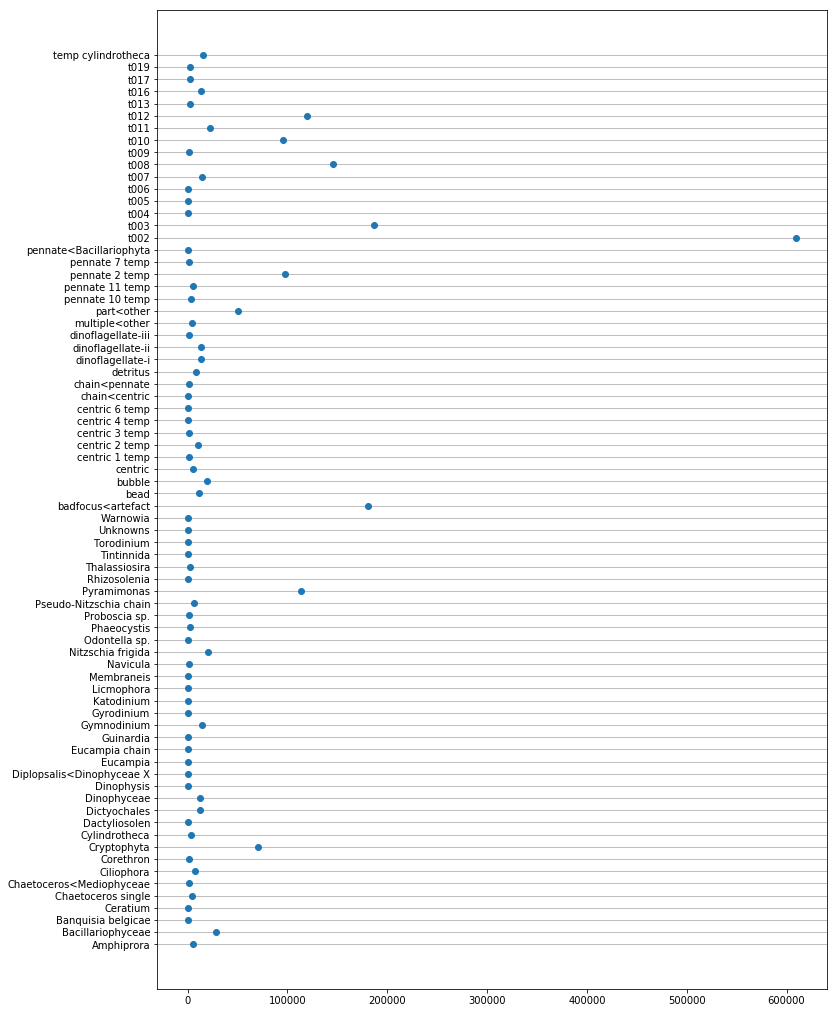

In [48]:
fig, ax = plt.subplots(figsize=(12, 18))
ax.scatter(sufficient_classes.values, range(0,len(sufficient_classes)))
ax.set_yticks(range(0,len(sufficient_classes)))
ax.set_yticklabels(list(sufficient_classes.index))
#ax.set_xlim(-10,500)
#ax.set_xscale('log')

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

# Turn on the minor TICKS, which are required for the minor GRID
#ax.minorticks_on()

# Customize the major grid
ax.grid(which='major', linestyle='-', linewidth='0.5', color='grey', axis='y')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

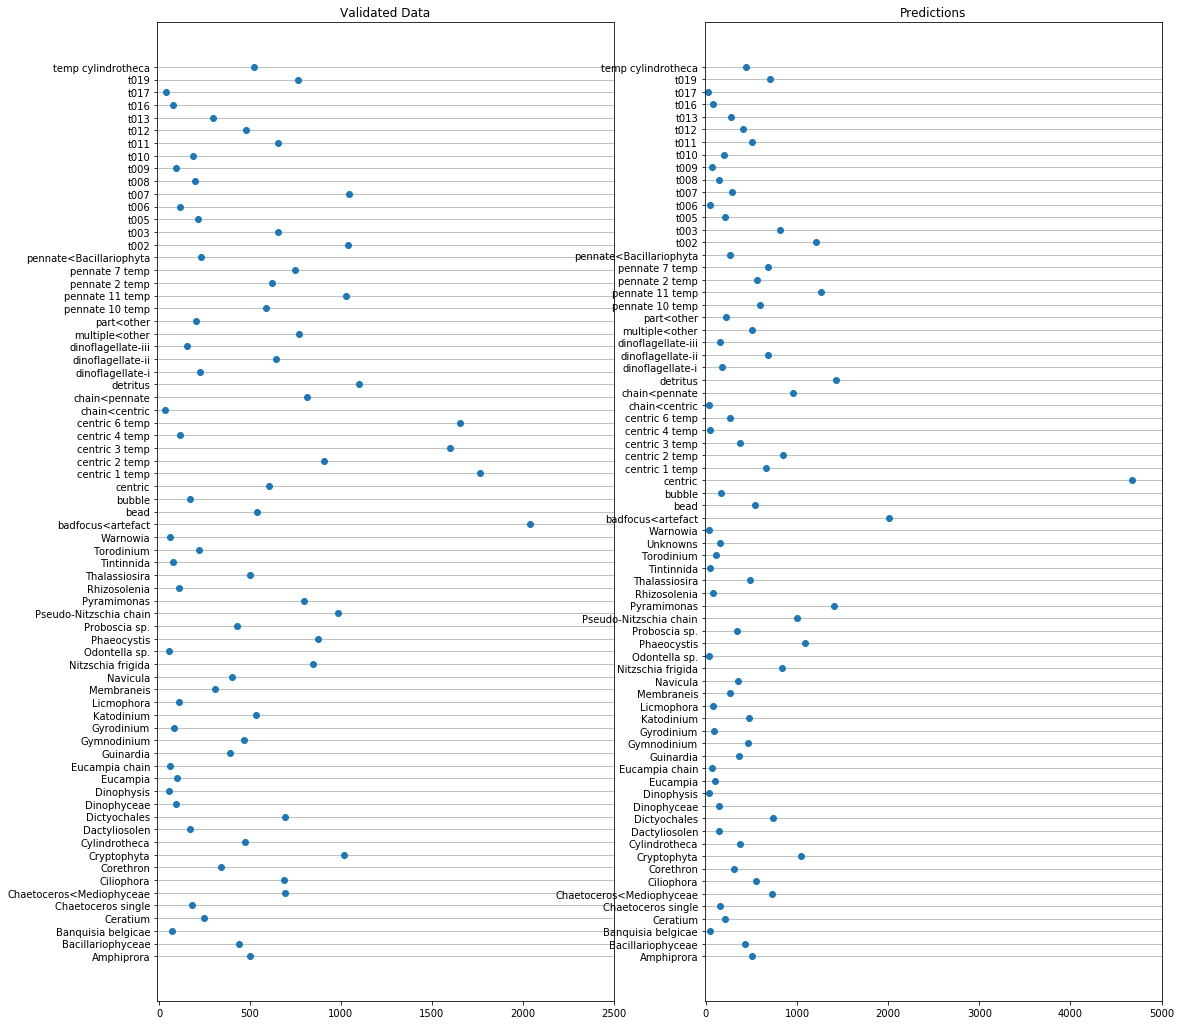

In [39]:
fig, ax = plt.subplots(1,2, figsize=(18, 18))
ax[1].scatter(sufficient_classes.values, range(0,len(sufficient_classes)))
ax[1].set_yticks(range(0,len(sufficient_classes)))
ax[1].set_yticklabels(list(sufficient_classes.index))
#ax.set_xlim(-10,500)
#ax.set_xscale('log')

# Don't allow the axis to be on top of your data
ax[1].set_axisbelow(True)
ax[1].set_xlim(-10,5000)
ax[1].set_title("Predictions")


# Turn on the minor TICKS, which are required for the minor GRID
#ax.minorticks_on()

# Customize the major grid
ax[1].grid(which='major', linestyle='-', linewidth='0.5', color='grey', axis='y')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

ax[0].scatter(counts, classes)
ax[0].set_yticks(range(0,len(class_id_dict)))
ax[0].set_yticklabels([id_class_dict[x] for x in classes])
ax[0].set_xlim(-10,2500)
#ax.set_xscale('log')

# Don't allow the axis to be on top of your data
ax[0].set_axisbelow(True)
ax[0].set_title("Validated Data")

# Turn on the minor TICKS, which are required for the minor GRID
#ax.minorticks_on()

# Customize the major grid
ax[0].grid(which='major', linestyle='-', linewidth='0.5', color='grey', axis='y')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.savefig('output_predictions_comparison_full.png', dpi=300)
plt.show()

In [ ]:
# pull out only validated images and run it on them and see how close the total numbers compare